<a href="https://colab.research.google.com/github/SamwelJane/Mchezopesa-Ltd-Football-analysis/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2019_08_Samwel_Jane_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. DEFINING THE QUESTION

##  a. SPECIFYING THE QUESTION:
Make Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank ing).

### Approach 1: Polynomial approach

Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores

### Approach 2 Logistic approach
Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

## b. METRIC FOR SUCCESS


* Perform a model with  high accuracy
*Optimize my Model using  Cross Validation
*Perform RMSE




## c. CONTEXT

A more detailed explanation and history of the rankings is available here: https://en.wikipedia.org/wiki/FIFA_World_Rankings (Links to an external site.)

An explanation of the ranking procedure is available here: https://www.fifa.com/fifa-world-ranking/procedure/men.html



## d. EXPERIMENTAL DESIGNS


*  Perform EDA
*  Perform Modelling
*Feature Engineering
* Cross validation





# 2.  Data Understanding

In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA


# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [0]:
# loading the dataset and previewing our dataset
#url= "https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc"
# review the first 5 rows
results=pd.read_csv('results.csv')
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
# define aour dataframe as rank 
# preview the fisrt 5 row in a oiur dataset
rank = pd.read_csv('fifa_ranking.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# explore  information about our  dataframe:ranking and results
print('Results Information:',results.info())
print('++++++++++++++++++++++++++++++++')


print('Rank Information:',rank.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
Results Information: None
++++++++++++++++++++++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur

In [0]:
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [0]:
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [0]:
# creating a new data frame for ranking called rank_df whcich has variables that i think might be important for this analysis
rank_df = rank[['rank','country_full','total_points','previous_points','rank_date']]
rank_df.head()

,rank,country_full,total_points,previous_points,rank_date
0,1,Germany,0.0,57,1993-08-08
1,2,Italy,0.0,57,1993-08-08
2,3,Switzerland,0.0,50,1993-08-08
3,4,Sweden,0.0,55,1993-08-08
4,5,Argentina,0.0,51,1993-08-08


In [0]:
# creating a copy of each dataset
rank_df2=rank_df.copy
results_df2=results_df.copy

In [0]:
# new data dataframe for results  will be called results_df
results_df = results[['date', 'home_team', 'away_team', 'home_score', 'away_score','tournament', 'country', 'neutral']]
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [0]:
# Renaming columns from country_ful to  home _team

r1 = rank_df.rename({'country_full': 'home_team'}, axis = 1)

r2 =rank_df.rename({'country_full': 'away_team'}, axis = 1)

In [0]:
#convert column date into datetime format
results['year'] = pd.DatetimeIndex(results['date']).year
results['month'] = pd.DatetimeIndex(results['date']).month


rank['year'] = pd.DatetimeIndex(rank['rank_date']).year
rank['month'] = pd.DatetimeIndex(rank['rank_date']).month

In [0]:
print( 'results:',results_df.shape)
print('rank:',rank_df.shape)

results: (40839, 8)
rank: (57793, 5)


In [0]:
# merging dataframes to form one dataframe called df

df=results.merge( rank,left_on=['country','year','month'], right_on=['country_full','year','month'],how='inner')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
df.to_csv('final.csv')
final= pd.read_csv('final.csv', index_col = 0)
final.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
final.shape
# checking the shape of our new data frame

(18808, 27)

In [0]:
# running a pandas report
# preview more info about the the dataset resport
# 
import pandas_profiling as pp


pp.ProfileReport(df)

Number of variables,13
Number of observations,10246510
Total Missing (%),0.0%
Total size in memory,1.0 GiB
Average record size in memory,105.0 B
Numeric,5
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


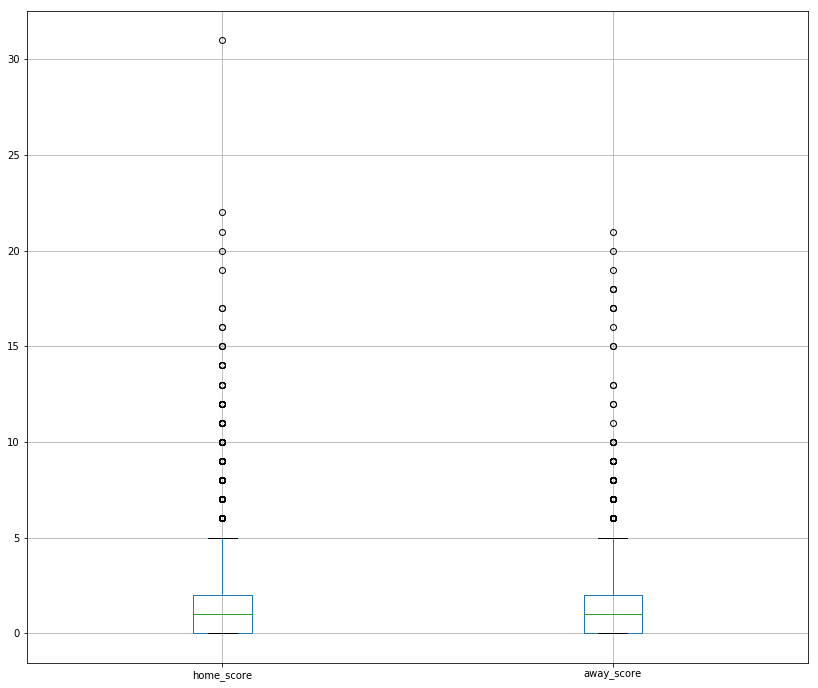

In [0]:
# checking for Outliers

column=['home_score','away_score']
plt.subplots(figsize=(14,12))
final.boxplot(column)
plt.title=('Outliers for home score and away score')
plt.show()
#Both Home score and away score  have outliers which rangaes between  4 - 32 in home score and 6-22 in away score 

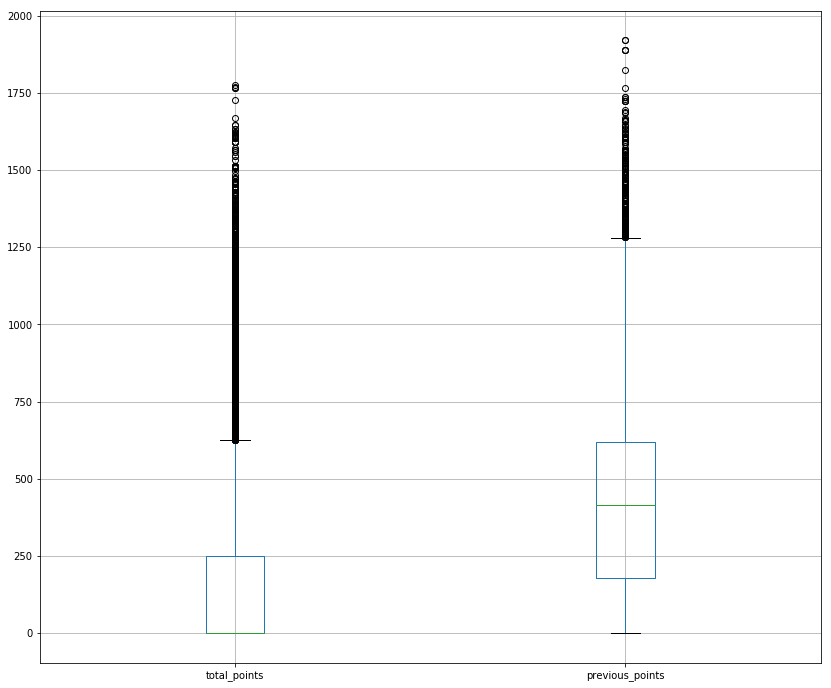

In [0]:
column=['total_points','previous_points']
plt.subplots(figsize=(14,12))
final.boxplot(column)
#Total point  column has more outliers than  previous points

In [0]:
final.describe()

,home_score,away_score,year,month,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000
mean,1.647756,1.094162,2006.595225,6.905625,76.158656,169.365066,439.275149,1.185878,85.652926,85.652926,83.502966,41.751588,83.247547,24.974266,84.915829,16.983202
std,1.692244,1.335397,6.804244,3.293365,50.325246,315.228232,323.107585,7.094176,166.673464,166.673464,164.869440,82.434807,162.685324,48.805558,166.444596,33.288925
min,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,-62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2001.000000,4.000000,33.000000,0.000000,179.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2007.000000,7.000000,71.000000,0.000000,415.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2012.000000,10.000000,111.000000,250.217500,620.000000,3.000000,106.860000,106.860000,102.485000,51.240000,95.227500,28.567500,103.357500,20.675000
max,31.000000,21.000000,2018.000000,12.000000,209.000000,1775.030000,1920.000000,73.000000,1158.660000,1158.660000,1169.570000,584.790000,1153.120000,345.940000,1200.770000,240.150000


In [0]:
df.groupby(['tournament','total_points']).sort_values()

In [0]:
# The code group county team based on the Total points and how many away score they scored
final.groupby(['country_full','total_points','away_score']).max()
final.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# checking which was the top total points gathered in any given time when ranging was done
print('maximum total point',final['total_points'].max())

maximum total point 1775.03


In [0]:
# the code shows last year's ranking based on 
final[['rank_date','country_full','total_points']].sort_values('total_points',ascending=False).head(10)


,rank_date,country_full,total_points
16196,2015-06-04,Germany,1775.03
15999,2015-03-12,Germany,1770.06
15492,2014-09-18,Germany,1765.05
15493,2014-09-18,Germany,1765.05
15792,2014-11-27,Germany,1725.29
15695,2014-10-23,Germany,1668.83
17222,2016-09-15,Argentina,1645.74
17655,2017-03-09,Argentina,1644.27
17538,2016-11-24,Argentina,1634.02
18215,2017-10-16,Germany,1631.05


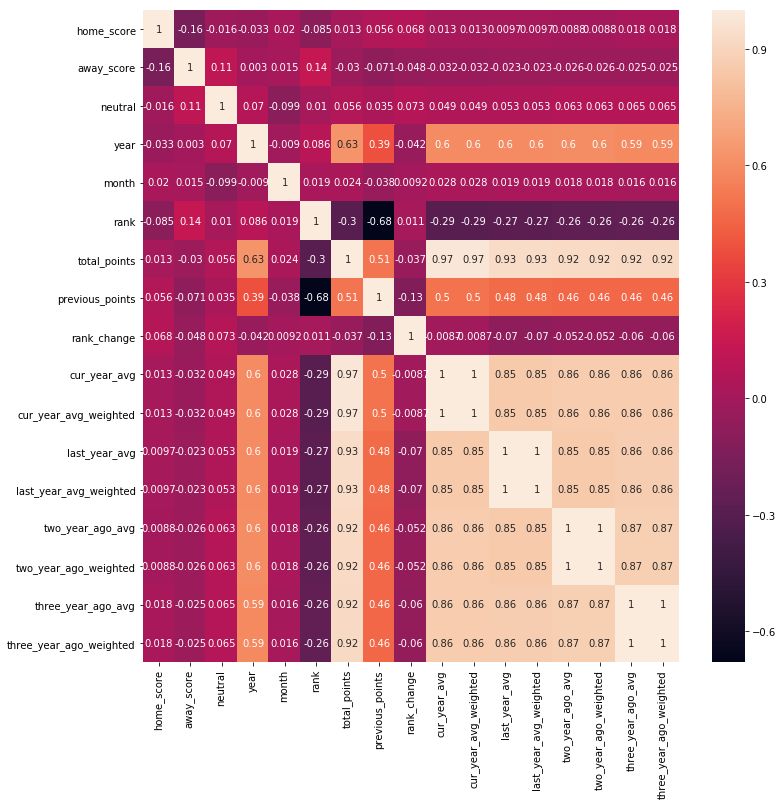

In [0]:
# Ploting the bivariate summaries and recording our observations
#

f, ax = plt.subplots(figsize=(12, 12))
corr = final.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          annot = True)
# year and total points have high correlation 0.63

In [0]:
#Score difference
final['scores'] = final['home_score'] - final['away_score']


In [0]:
final.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,scores
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,0
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,4
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,-1
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,-1


In [0]:
def results(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Loss'
  else:
      return 'Draw'

In [0]:

final['home_results']=final['scores'].apply(lambda x :results(x))

In [0]:
final.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,scores,home_results
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,0,Draw
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1,Win
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,Colombia,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,4,Win
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,-1,Loss
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,Peru,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,-1,Loss


#  Polynomial Regression
# Model 1

In [0]:
# creatinf two dataframe for both X and y1.
 #The  y1 represent the our model 1 dependent variable
X = final['rank'].values.reshape(-1,1)
y1= final['away_score'].values



In [74]:
# printing the output
print(X)
print(y1)

[[19]
 [19]
 [19]
 ...
 [51]
 [94]
 [63]]
[0 1 0 ... 2 3 0]


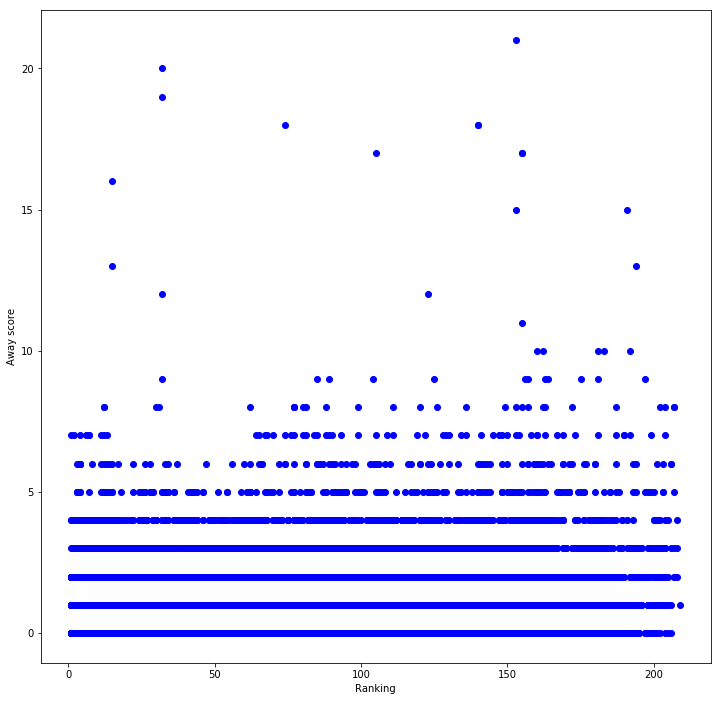

In [75]:
# Since our datasets have been joined and are pretty clean, let's start by visualizing our dataset by plotting a scatter plot
plt.subplots(figsize=(12, 12))
plt.scatter(X, y1, color='blue') 

#.title('Ranking_and_away score')
plt.xlabel('Ranking')
plt.ylabel('Away score')
plt.show()

In [0]:
#  Split the dataset into train and test sets
X_train, y1_train, X_test, y1_test = train_test_split(X,y1, test_size = 0.2, random_state=0)


In [0]:
X.shape

(18808, 1)

In [0]:
y1.shape

(18808,)

In [0]:
# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

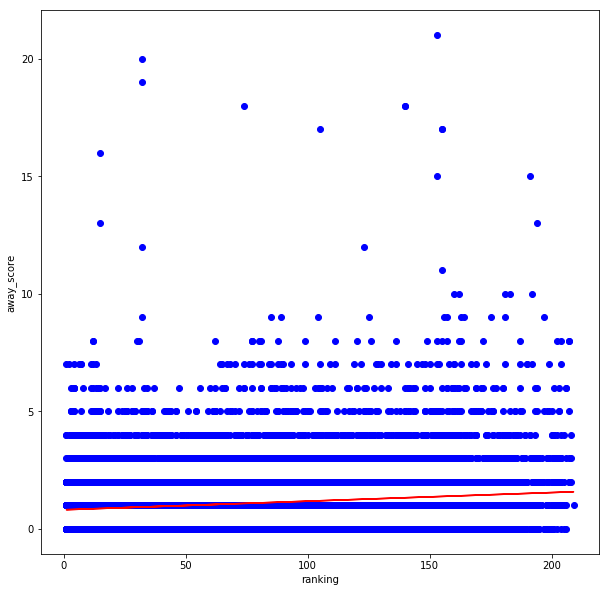

In [0]:
# Visualize the Linear Regression results
plt.subplots(figsize=(10,10))
plt.scatter(X,y1, color='blue')
plt.plot(X,reg_line.predict(X), color='red')
#plt.title('Ranking_and _away_score(Linear Regression)')
plt.xlabel('ranking')
plt.ylabel('away_score')
plt.show()

In [0]:
# Fit polynomial Regression to the dataset
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Visualize the Polynomial Regression results
#plt.scatter(X, y1, color='blue') # You can put any color you like. This just helps us highlight the data points
#plt.plot(X, pol_reg.predict(X_poly), color='red')
#plt.title('Polynomial Regression')
#plt.xlabel('Ranking')
#plt.ylabel('Away_score')
#plt.show()

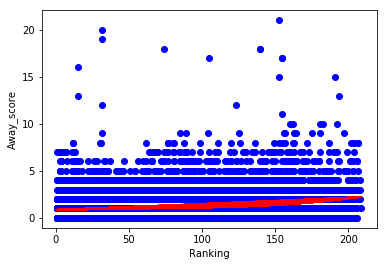

In [0]:
#Visualize the Polynomial Regression results
plt.scatter(X, y1, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, poly_reg.predict(X_poly), color='red')
#plt.title('Polynomial Regression')
plt.xlabel('Ranking')
plt.ylabel('Away_score')
plt.show()


In [0]:
# Predictiong use Linear regression
# Predict using linear regression

predict = reg_line.predict(X_poly)
print('Linear prediction:',predict)

ValueError: ignored

In [0]:
# Predict using Polynomial Regression
poly_pred = poly_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction:',poly_pred)

AttributeError: ignored

# Model 2

# Logistic Regression

In [0]:
sb.countplot(x='Survived',data=titanic, palette='hls')


In [0]:
# Splitting our dataset
#
